In [1]:
import csv
import numpy as np

In [2]:
def get_data(filename):
# You will need to write code that will read the file passed
# into this function. The first line contains the column headers
# so you should ignore it
# Each successive line contians 785 comma separated values between 0 and 255
# The first value is the label
# The rest are the pixel values for that picture
# The function will return 2 np.array types. One with all the labels
# One with all the images
#
# Tips:
# If you read a full line (as 'row') then row[0] has the label
# and row[1:785] has the 784 pixel values
# Take a look at np.array_split to turn the 784 pixels into 28x28
# You are reading in strings, but need the values to be floats
# Check out np.array().astype for a conversion

    with open(filename) as training_file:
        csv_reader  = csv.reader(training_file, delimiter =',')
        Header_Row  = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if Header_Row:
                Header_Row = False
            else:
                temp_labels.append(row[0])
                images_data = row[1:785]
                image_data_as_array = np.array_split(images_data,28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images,labels


In [3]:
train_file_path = 'C:/VIN_PYCHARM/ONE/Data/sign_mnist_train.csv'
validate_file_path= 'C:/VIN_PYCHARM/ONE/Data/sign_mnist_test.csv'

train_images, train_labels = get_data(train_file_path)
validate_images, validate_labels = get_data(validate_file_path)

print(train_images.shape)
print(train_labels.shape)
print(validate_images.shape)
print(validate_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_images = np.expand_dims(train_images,axis=3)
validate_images = np.expand_dims(validate_images,axis=3)


train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D(2, 2),

tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),

tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

In [7]:
model.compile(  optimizer='adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [8]:
history = model.fit_generator(  train_datagen.flow(train_images, train_labels, batch_size=32),
                                steps_per_epoch=len(train_images) / 32,
                                epochs=15,
                                validation_data=validation_datagen.flow(validate_images, validate_labels, batch_size=32),
                                validation_steps=len(validate_images) / 32,
                                verbose= 1)

Epoch 1/15
858/857 [==============================] - 32s 38ms/step - loss: 2.8848 - accuracy: 0.1318 - val_loss: 2.0604 - val_accuracy: 0.3113

In [9]:
model.evaluate(validate_images, validate_labels)

225/225 [==============================] - 2s 11ms/step - loss: 276.2726 - accuracy: 0.5361

[276.2725830078125, 0.5361126661300659]

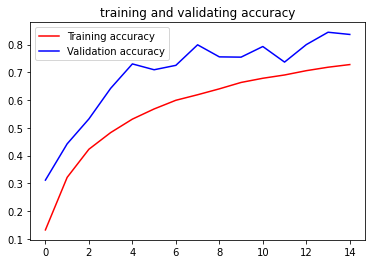

<Figure size 432x288 with 0 Axes>

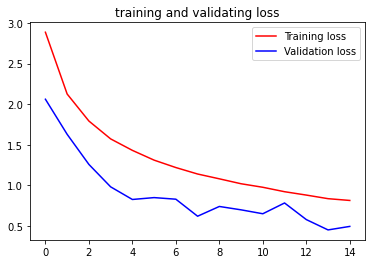

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('training and validating accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('training and validating loss')
plt.legend(loc=0)

